(ebm:solution_tmp)=
# Simplified Energy Balance Model

**Task 1:** Write a Python function for the OLR and effective temperature for later use.

In [1]:
# Stefan-Boltzmann constant
sigma = 5.67e-8

def T_eff(OLR):
    """ Effective global mean emission temperature """
    return (OLR/sigma)**(0.25)
     
def OLR(T):
    """ Stefan-Boltzmann law """
    return sigma * T**4

**Task 2:** Extend the OLR function by another **transmissivity** constant $\tau$ which takes this effect into account. Determine the transmissivity for a global mean temperature of 288 K.

In [2]:
def OLR(T, tau):
    """ Stefan-Boltzmann law """
    return tau * sigma * T**4

def tau(OLR, T):
    """ Calculate transmissivity """
    return OLR / (sigma*T**4)

In [3]:
print("Transmissivity assuming a global mean temperature of 288 K: {:.2f}".format(tau(238.5, 288)))

Transmissivity assuming a global mean temperature of 288 K: 0.61


**Task 3:** Determine the planetary albedo from the observations and write a function for the absorbed shortwave radiation, the part of the incoming sunlight that is not reflected back to space

In [4]:
Q = 341.3           # area-averaged insolation 
Freflected = 101.9  # reflected shortwave flux in W/m2
alpha = Freflected/Q

print("Planetary Albedo: {0}".format(alpha))


Planetary Albedo: 0.29856431292118374


In [5]:
def ASR(Q, albedo):
    """ Absorbed shortwave radiation """
    return (1-albedo) * Q

In [6]:
print("Absorbed shortwave radiation: {}".format(ASR(Q, alpha)))

Absorbed shortwave radiation: 239.4


**Task 4:** What additional amount of energy would have to remain in the system for the global temperature to rise by 4 K?

In [7]:
print("Additionaly energy to increase global mean temperature by 4 K: {:.2f} W m^-2".format(OLR(292, 0.61)-OLR(288, 0.61)))

Additionaly energy to increase global mean temperature by 4 K: 13.50 W m^-2


**Task 5:** Rearrange the equation according to the temperature denoting our equilibrium temperature. Substitute the observed values for insolation, transmissivity and planetary albedo and calculate the equlibrium temperature.

In [8]:
def equilibrium_temperature(alpha,Q,tau):
    """ Equilibrium temperature """
    return ((1-alpha)*Q/(tau*sigma))**(1/4)

Teq_observed = equilibrium_temperature(alpha,Q,tau(238.5, 288))
print(Teq_observed)

288.2713144788922


**Task 6:** With simple approaches such as equlibrium temperature, conceptual scenarios can be calculated. For example, the connection between the increase in albedo due to more cloud cover and the associated decrease in transmissivity can be investigated. For example, assume that the planetary albedo increases to 0.32 due to more cloud cover and that the transmissivity decreases to 0.57. What is the equilibrium temperature?

In [9]:
Teq_new = equilibrium_temperature(0.32, Q, 0.57)

#  an example of formatted print output, limiting to two or one decimal places
print('The new equilibrium temperature is {:.2f} K.'.format(Teq_new))
print('The equilibrium temperature increased by about {:.1f} K.'.format(Teq_new-Teq_observed))

The new equilibrium temperature is 291.10 K.
The equilibrium temperature increased by about 2.8 K.


**Task 8:** Write a function called *step_forward(T, dt)* that returns the new temperature given the old temeprature T and timestep dt. Assume an initial temperature of 288 K and integrate the function for a few timestep and observe how the temperature changes.

In [10]:
def step_forward(Q, T, Cw, alpha, tau, dt):
    return T + dt / Cw * ( ASR(Q, alpha) - OLR(T, tau) )

In [11]:
T0 = 288
dt = 60*60*24*365
Cw = 10**10
T = step_forward(341.3, T0, Cw, 0.32, 0.57, dt)
print('New equlibrium temperature {:.2f} after 1 year'.format(T))

New equlibrium temperature 288.03 after 1 year


In [12]:
T = step_forward(Q, T, Cw, 0.32, 0.57, dt)
print('New equlibrium temperature {:.2f} after 2 years'.format(T))

New equlibrium temperature 288.06 after 2 years


In [13]:
T = step_forward(Q, T, Cw, 0.32, 0.57, dt)
print('New equlibrium temperature {:.2f} after 3 years'.format(T))

New equlibrium temperature 288.09 after 3 years


**Task 9:** Integrate the equation over a time of 200 years and plot the result. Use the following initial and boundary conditions: 

$
\begin{align}
S_0 &=1360 ~ W m^{-2} \\
T_0 &= 273 ~ K \\ 
C_w &= 10^8 ~ J/(m^2 \cdot K) \\
\alpha &= 0.3 \\
\tau &= 0.64
\end{align}
$

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def OLR(T, tau):
    """ Stefan-Boltzmann law """
    sigma = 5.67e-8
    return tau * sigma * T**4

def ASR(Q, alpha):
    """ Absorbed shortwave radiation """
    return (1-alpha) * Q


def step_forward(Q, T, Cw, alpha, tau, dt):
    return T + dt / Cw * ( ASR(Q, alpha) - OLR(T, tau) )


def ebm(T0, Q=341.3, Cw=10e8, alpha=0.3, tau=0.64, years=100):
    ''' This is a simple Energy Balance Model with global radiation and outgoing longwave radiation.'''
  
    # Create result arrays
    Ts    = np.zeros(years+1)
    Years = np.zeros(years+1)
    
    # Timestep
    dt = 60*60*24*365                  # convert days to seconds

    # Initial and boundary conditions
    Ts[0] = T0 

    # Calculation
    for n in range(years):
        Years[n+1] = n+1
        Ts[n+1] = step_forward( Q, Ts[n], Cw, alpha, tau, dt )
        
        
    return Years, Ts




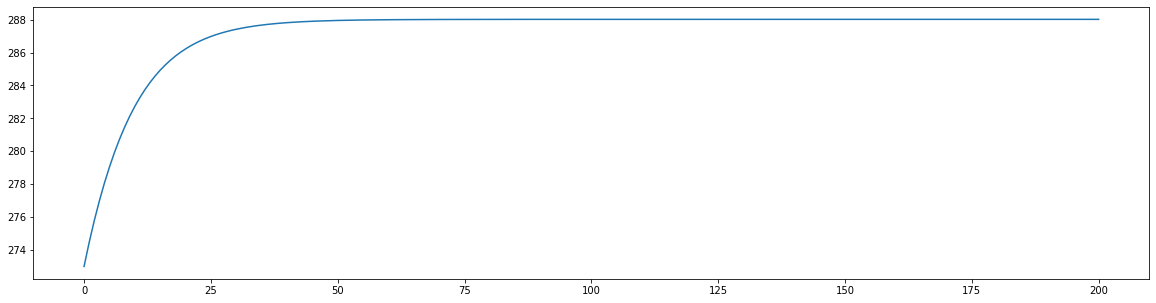

In [15]:
# Integrate the model
yrs, T_273 = ebm(273, Q=1360/4, alpha=0.30, tau=0.61, years=200)

# Plot results
fig = plt.figure(figsize=(20,5))
plt.plot(T_273)